In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\dilip\Downloads\finalTrain.csv")

In [3]:
df.head(3)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21


In [4]:
df.drop('ID',axis=1,inplace=True)
df.drop('Delivery_person_ID',axis=1,inplace=True)

In [5]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [6]:
df.shape

(45584, 18)

In [7]:
df.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [8]:
### Missing values are found in Delivery_person_Age,Delivery_person_Ratings,Time_Orderd ,Weather_conditions,Road_traffic_density,City,Festival,multiple_deliveries 

In [9]:
df.dtypes

Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
dtype: object

In [10]:
###There are 10 categorical feature and 7 nuemerical feature 9

In [11]:
##check for duplicated records

df.duplicated().sum()

0

In [12]:
###no duplicated values are found

In [13]:
numerical_columns=[features for features in df.columns if df[features].dtype!='O']
numerical_columns

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)']

In [14]:
categorical_columns=[features for features in df.columns if df[features].dtype=='O']
categorical_columns

['Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

In [15]:
df[categorical_columns].describe()

,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,45584,43853,45584,44968,44983,45584,45584,45356,44384
unique,44,176,193,6,4,4,4,2,3
top,15-03-2022,21:55,21:30,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1192,461,495,7653,15476,11530,26429,44460,34087


In [16]:
for features in categorical_columns:
    print(df[features].value_counts())

15-03-2022    1192
03-04-2022    1178
13-03-2022    1169
26-03-2022    1165
24-03-2022    1162
09-03-2022    1159
05-04-2022    1156
05-03-2022    1154
07-03-2022    1153
03-03-2022    1150
21-03-2022    1149
11-03-2022    1148
19-03-2022    1148
30-03-2022    1141
01-03-2022    1140
28-03-2022    1139
17-03-2022    1134
01-04-2022    1133
02-03-2022    1012
10-03-2022     996
16-03-2022     995
20-03-2022     993
02-04-2022     992
06-03-2022     986
04-03-2022     980
29-03-2022     977
25-03-2022     974
14-03-2022     973
11-02-2022     970
18-03-2022     968
31-03-2022     967
27-03-2022     965
08-03-2022     964
12-03-2022     964
23-03-2022     964
06-04-2022     961
13-02-2022     957
15-02-2022     945
04-04-2022     941
17-02-2022     939
12-02-2022     864
16-02-2022     861
18-02-2022     855
14-02-2022     851
Name: Order_Date, dtype: int64
21:55          461
17:55          456
0.833333333    449
22:20          448
21:35          446
              ... 
14:30           57


C:\Users\dilip\AppData\Local\Temp\ipykernel_22100\2618886477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],kde=True)


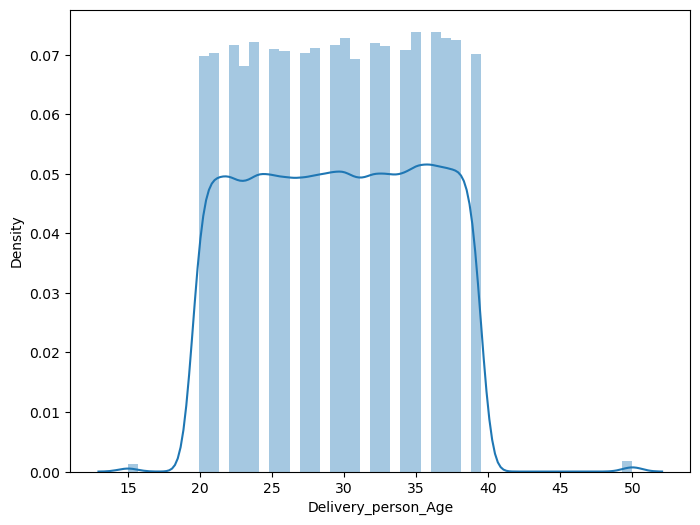

C:\Users\dilip\AppData\Local\Temp\ipykernel_22100\2618886477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],kde=True)


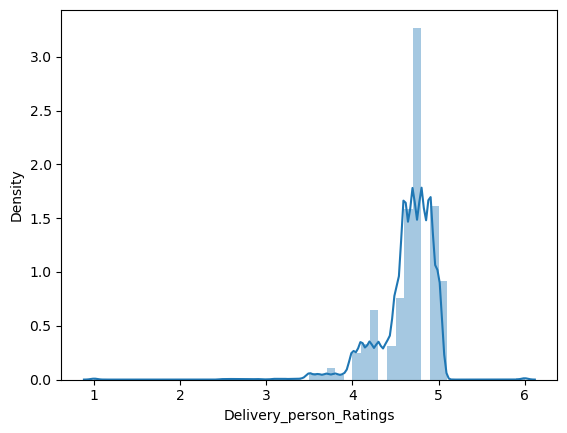

C:\Users\dilip\AppData\Local\Temp\ipykernel_22100\2618886477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],kde=True)


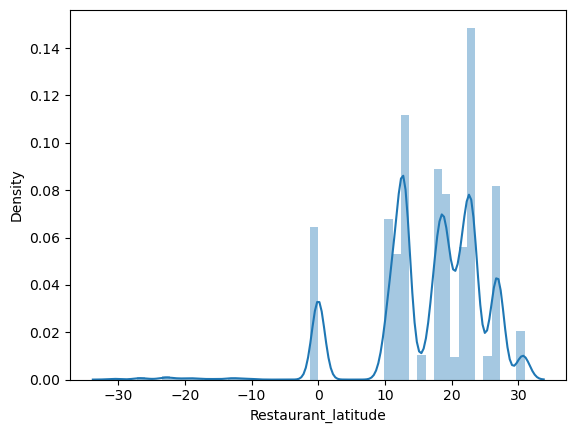

C:\Users\dilip\AppData\Local\Temp\ipykernel_22100\2618886477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],kde=True)


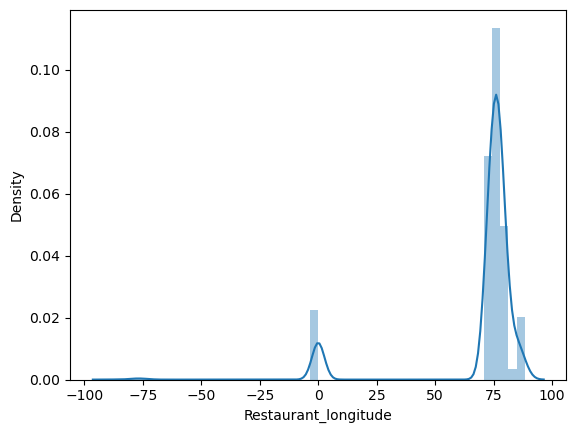

C:\Users\dilip\AppData\Local\Temp\ipykernel_22100\2618886477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],kde=True)


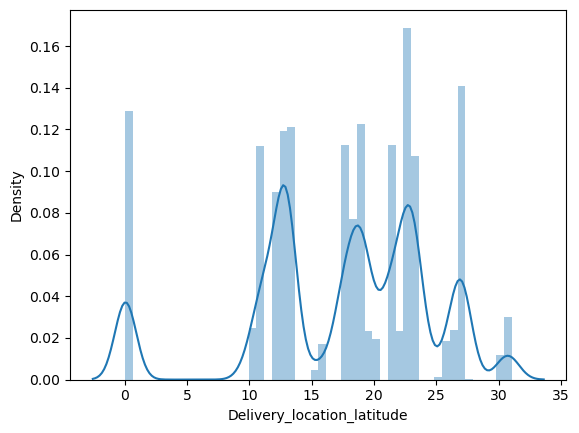

C:\Users\dilip\AppData\Local\Temp\ipykernel_22100\2618886477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],kde=True)


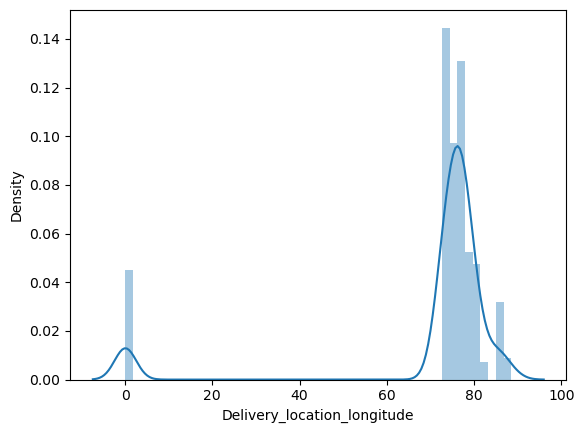

C:\Users\dilip\AppData\Local\Temp\ipykernel_22100\2618886477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],kde=True)


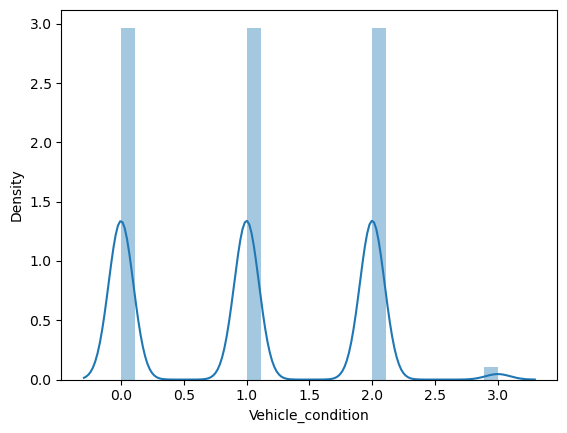

C:\Users\dilip\AppData\Local\Temp\ipykernel_22100\2618886477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],kde=True)


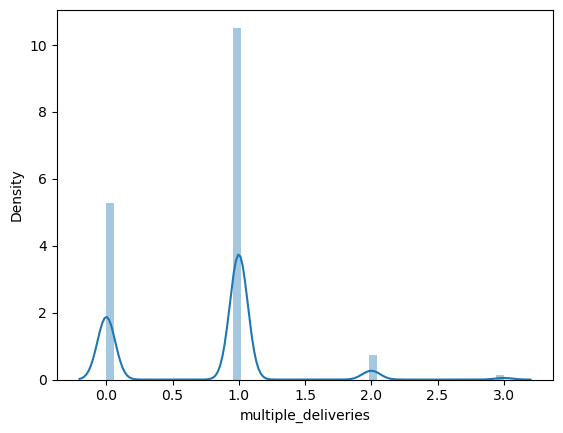

C:\Users\dilip\AppData\Local\Temp\ipykernel_22100\2618886477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],kde=True)


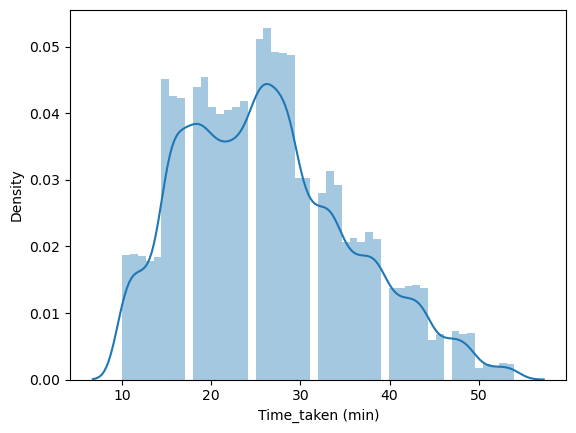

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=1
for i in numerical_columns:
    sns.distplot(df[i],kde=True)
    print('\n')
    plt.show()

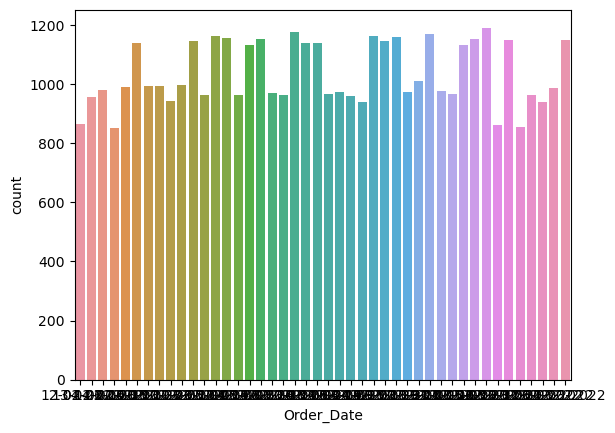

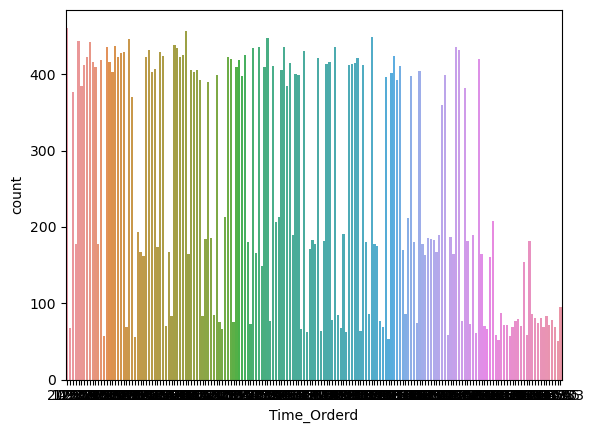

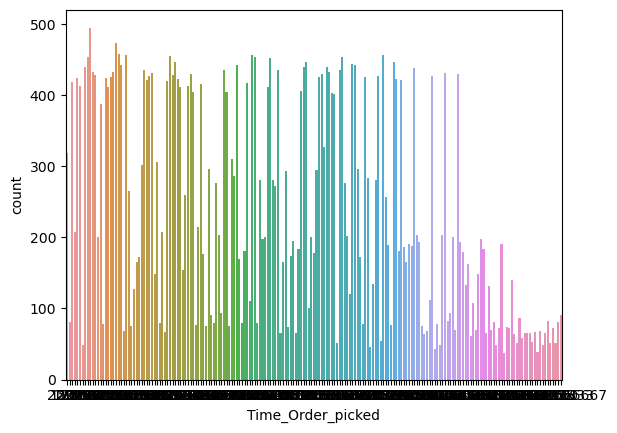

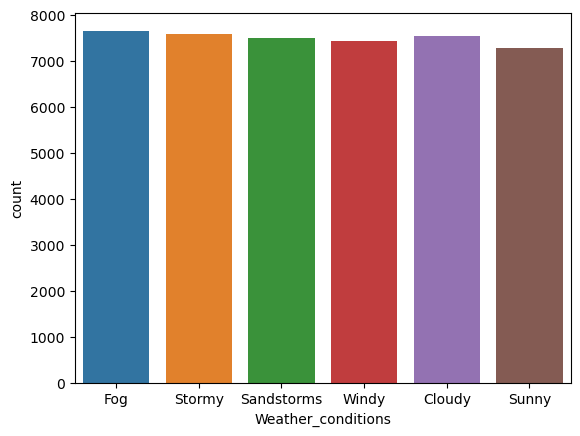

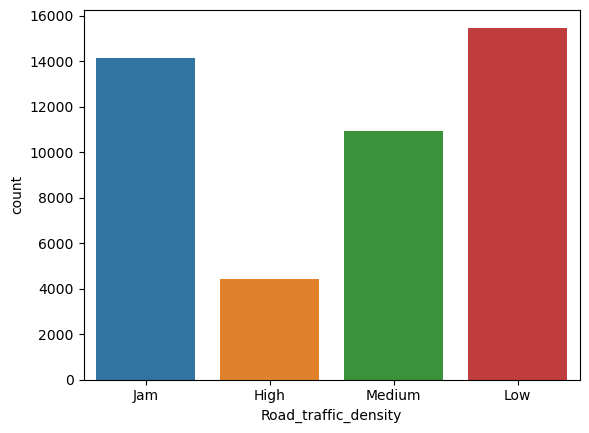

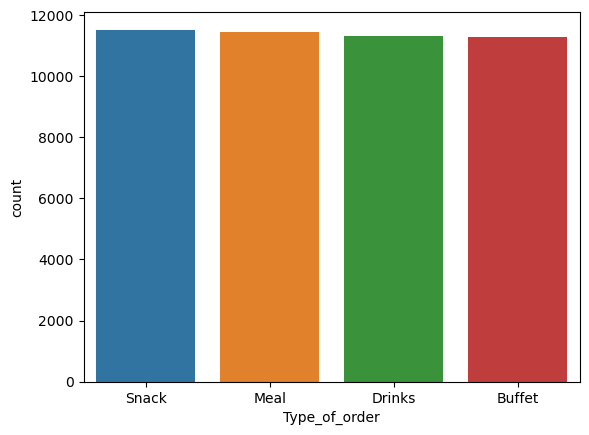

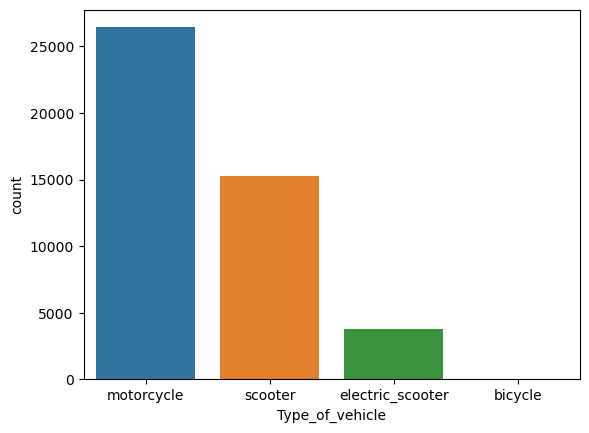

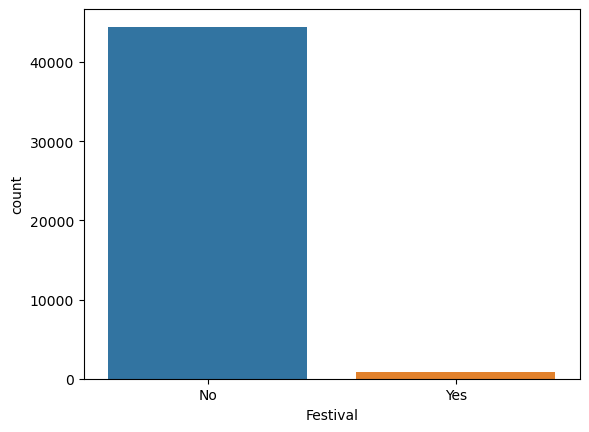

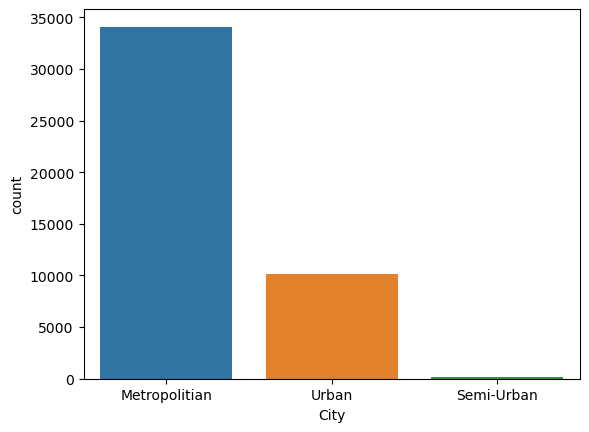

In [18]:
for i in categorical_columns:
    sns.countplot(x=df[i])
    print('\n')
    plt.show()

In [19]:
df.corr()

C:\Users\dilip\AppData\Local\Temp\ipykernel_22100\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
Delivery_person_Age,1.000000,-0.067959,-0.004522,-0.009360,0.002501,-0.000507,0.003162,0.115904,0.299523
Delivery_person_Ratings,-0.067959,1.000000,-0.007823,-0.014211,-0.010350,-0.013560,0.034592,-0.117631,-0.338814
Restaurant_latitude,-0.004522,-0.007823,1.000000,0.661818,0.866369,0.602744,-0.033576,0.008091,0.013970
Restaurant_longitude,-0.009360,-0.014211,0.661818,1.000000,0.632335,0.915023,-0.038734,0.004438,0.007787
Delivery_location_latitude,0.002501,-0.010350,0.866369,0.632335,1.000000,0.690560,-0.001629,0.010325,0.014234
Delivery_location_longitude,-0.000507,-0.013560,0.602744,0.915023,0.690560,1.000000,-0.001946,0.004999,0.007590
Vehicle_condition,0.003162,0.034592,-0.033576,-0.038734,-0.001629,-0.001946,1.000000,-0.097224,-0.234456
multiple_deliveries,0.115904,-0.117631,0.008091,0.004438,0.010325,0.004999,-0.097224,1.000000,0.387042
Time_taken (min),0.299523,-0.338814,0.013970,0.007787,0.014234,0.007590,-0.234456,0.387042,1.000000


we see that Delivery_location_latitude and Delivery_location_longitude are more correlated to Restaurant_latitude and Restaurant_latitude so we can drop either of them 

In [20]:
df.drop(['Restaurant_latitude','Restaurant_longitude'],axis=1,inplace=True)

C:\Users\dilip\AppData\Local\Temp\ipykernel_22100\290241485.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(i).mean().reset_index()


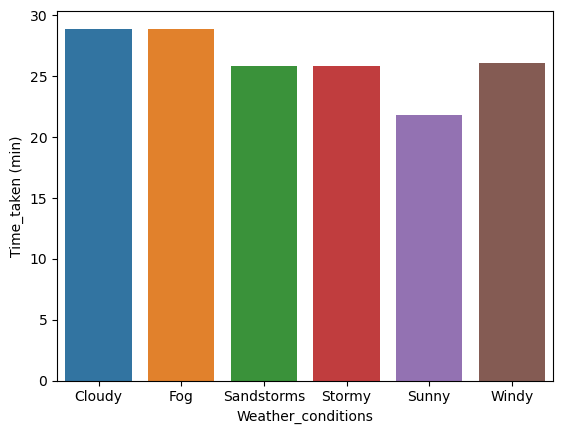

C:\Users\dilip\AppData\Local\Temp\ipykernel_22100\290241485.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(i).mean().reset_index()


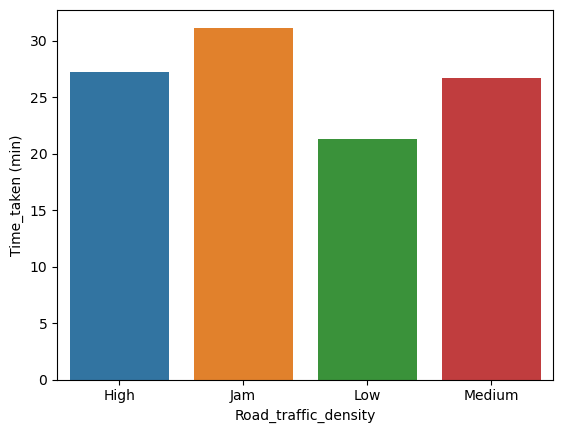

C:\Users\dilip\AppData\Local\Temp\ipykernel_22100\290241485.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(i).mean().reset_index()


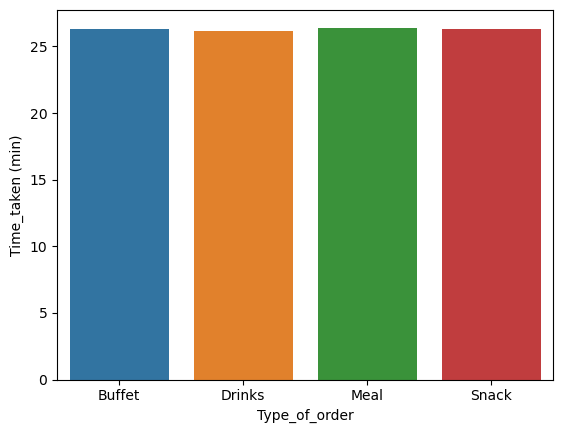

C:\Users\dilip\AppData\Local\Temp\ipykernel_22100\290241485.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(i).mean().reset_index()


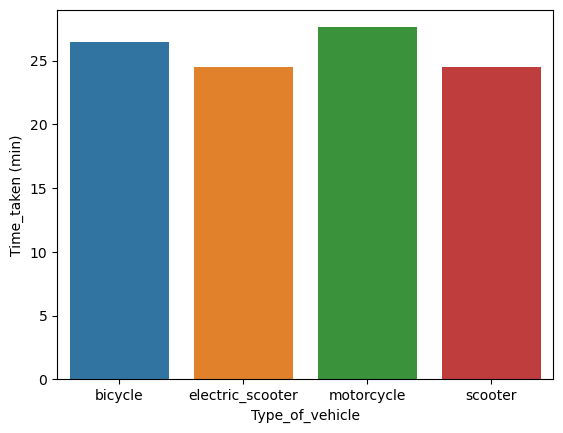

C:\Users\dilip\AppData\Local\Temp\ipykernel_22100\290241485.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(i).mean().reset_index()


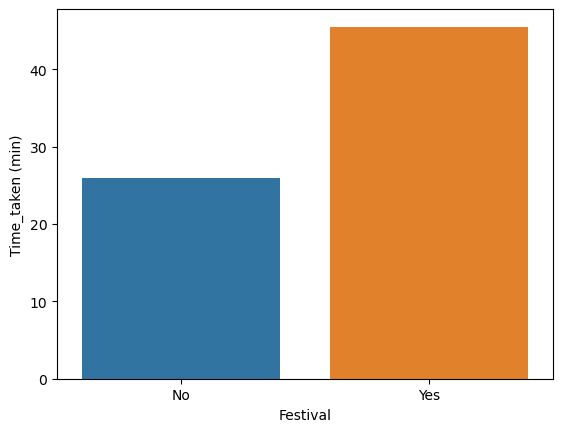

C:\Users\dilip\AppData\Local\Temp\ipykernel_22100\290241485.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(i).mean().reset_index()


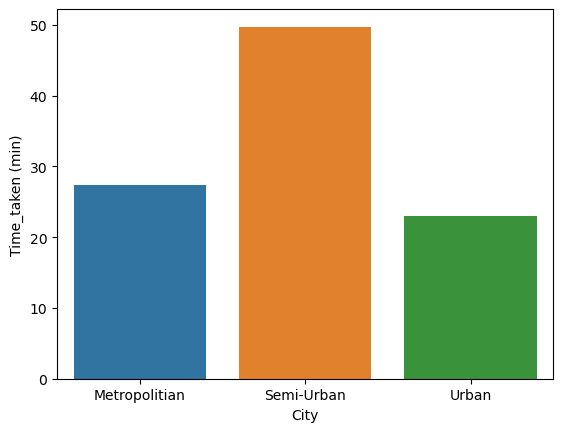

In [21]:
coulmns=['Weather_conditions','Road_traffic_density','Type_of_order','Type_of_vehicle','Festival','City']
for i in coulmns:
    
    grouped = df.groupby(i).mean().reset_index()
    sns.barplot(x=i, y='Time_taken (min)', data=grouped)
    plt.show()

In [22]:
df['Weather_conditions'].unique()

array(['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny', nan],
      dtype=object)

In [23]:
Weather_conditions_map={'Sunny':1,'Stormy':2,'Sandstorms':2,'Windy':4,'Cloudy':5,'Fog':5}

In [24]:
df['Road_traffic_density'].unique()

array(['Jam', 'High', 'Medium', 'Low', nan], dtype=object)

In [25]:
Road_traffic_density_map={'Low':1,'Medium':2,'High':3,'Jam':4}

In [26]:
df['Type_of_vehicle'].unique()

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

In [27]:
Type_of_vehicle_map={'electric_scooter':1,'scooter':2,'bicycle':3,"motorcycle":4}

In [28]:
df['Festival'].unique()

array(['No', 'Yes', nan], dtype=object)

In [29]:
Festival_map={'No':1,'Yes':2}

In [30]:
df['City'].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban', nan], dtype=object)

In [31]:
City_map={'Urban':1,'Metropolitian':2,'Semi-Urban':3}

In [32]:
df['Weather_conditions']=df['Weather_conditions'].map(Weather_conditions_map)
df['Road_traffic_density']=df['Road_traffic_density'].map(Road_traffic_density_map)
df['Type_of_vehicle']=df['Type_of_vehicle'].map(Type_of_vehicle_map)
df['Festival']=df['Festival'].map(Festival_map)
df['City']=df['City'].map(City_map)


In [33]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.397968,78.116106,12-02-2022,21:55,22:10,5.0,4.0,2,Snack,4,3.0,1.0,2.0,46
1,21.0,4.7,10.043064,76.347589,13-02-2022,14:55,15:05,2.0,3.0,1,Meal,4,1.0,1.0,2.0,23
2,23.0,4.7,18.652450,74.006619,04-03-2022,17:30,17:40,2.0,2.0,1,Drinks,2,1.0,1.0,2.0,21
3,34.0,4.3,30.919584,75.829346,13-02-2022,09:20,09:30,2.0,1.0,0,Buffet,4,0.0,1.0,2.0,20
4,24.0,4.7,26.593504,80.502929,14-02-2022,19:50,20:05,5.0,4.0,1,Snack,2,1.0,1.0,2.0,41


In [35]:
df.to_csv('zomatodataset.csv',index=True)